In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from qiskit_machine_learning.datasets import ad_hoc_data
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit_algorithms.optimizers import SPSA, COBYLA
from qiskit.circuit.library import TwoLocal, ZZFeatureMap, RealAmplitudes

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from qiskit_algorithms.utils import algorithm_globals
from sklearn.preprocessing import MinMaxScaler

iris_data = load_iris()

In [4]:
features = iris_data.data
labels = iris_data.target

In [5]:
features = MinMaxScaler().fit_transform(features)

In [6]:
algorithm_globals.random_seed = 123
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, random_state=algorithm_globals.random_seed
)

In [7]:
optimizer = SPSA(maxiter=200)
feature_map = ZZFeatureMap(feature_dimension=4, reps=1)
var_form = TwoLocal(4, ['ry', 'rz'], 'cz', reps=4)
vqc = VQC(optimizer = optimizer, feature_map = feature_map, ansatz=var_form, loss="cross_entropy")

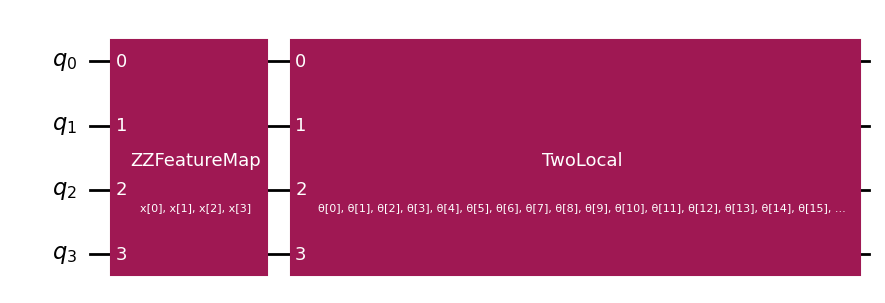

In [8]:
vqc.circuit.draw(output='mpl')

In [9]:
vqc.fit(train_features, train_labels)

In [10]:
vqc.score(train_features, train_labels)

0.925

In [11]:
vqc.score(test_features, test_labels)

0.9

In [12]:
predict = vqc.predict(test_features)
print(f"Predicted labels: {predict}")
print(f"Ground truth:     {test_labels}")

Predicted labels: [1 2 2 1 0 1 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 1 0 1 0 0 0 2 2 0]
Ground truth:     [1 2 2 1 0 2 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 2 0 2 0 0 0 2 2 0]
